In [124]:
#!nvidia-smi

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

## Train/test split

In [126]:
provinces = ['BKK','Chiangmai','Khonkaen','Rayong','Saraburi','Surat']
province = provinces[2]

In [127]:
data_training = pd.read_csv(province+'/train/'+province.lower()+'_train_format.csv', date_parser = True)
data_training.sample(5)

,date_time,PM2.5,temp,wind speed,wind dir,lat,long
815,2017-08-03 23:00:00,6.0,28.2,41.0,265.0,16.445329,102.835251
18963,2019-08-30 03:00:00,19.0,24.8,41.0,310.0,16.445329,102.835251
20333,2019-10-26 05:00:00,22.0,23.4,40.0,70.0,16.445329,102.835251
1425,2017-08-29 09:00:00,6.0,24.6,17.0,265.0,16.445329,102.835251
10896,2018-09-28 00:00:00,37.0,28.4,9.0,210.0,16.445329,102.835251


In [128]:
data_training = data_training.drop(['date_time', 'lat', 'long'], axis = 1)
data_training.head()

,PM2.5,temp,wind speed,wind dir
0,5.0,26.5,28.0,235.0
1,7.0,26.5,28.0,235.0
2,4.0,26.5,28.0,235.0
3,9.0,26.5,28.0,235.0
4,8.0,25.8,29.0,245.0


In [129]:
data_test = pd.read_csv(province+'_clean.csv', date_parser = True)
data_test.sample(5)

,Unnamed: 0,date_time,PM2.5,temp,wind speed,wind dir,lat,long
6631,6631,2021-04-03 07:00:00,32.0,27.2,13,170,16.445329,102.835251
3429,3429,2020-11-20 21:00:00,33.0,27.5,4,15,16.445329,102.835251
5920,5920,2021-03-04 16:00:00,33.0,32.1,8,210,16.445329,102.835251
1004,1004,2020-08-11 20:00:00,22.0,28.2,4,275,16.445329,102.835251
3247,3247,2020-11-13 07:00:00,38.0,19.5,25,55,16.445329,102.835251


In [130]:
data_test = data_test.drop(['Unnamed: 0', 'lat', 'long'], axis = 1)
data_test.head()

,date_time,PM2.5,temp,wind speed,wind dir
0,2020-07-01 00:00:00,11.0,27.6,21,230
1,2020-07-01 01:00:00,14.0,26.7,37,240
2,2020-07-01 02:00:00,15.0,26.7,37,240
3,2020-07-01 03:00:00,11.0,26.7,37,240
4,2020-07-01 04:00:00,9.0,25.5,39,255


## Normalize data

In [131]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)

In [132]:
scaler.inverse_transform(data_training)

array([[  5. ,  26.5,  28. , 235. ],
       [  7. ,  26.5,  28. , 235. ],
       [  4. ,  26.5,  28. , 235. ],
       ...,
       [ 22. ,  29.6,  20. , 235. ],
       [ 20. ,  29.6,  21. , 230. ],
       [ 13. ,  29.6,  21. , 230. ]])

In [133]:
scale = 1/scaler.scale_
temp = (data_training * scale) + scaler.min_
temp

array([[  3.99418605,  15.77088608,  28.        , 235.        ],
       [  5.99418605,  15.77088608,  28.        , 235.        ],
       [  2.99418605,  15.77088608,  28.        , 235.        ],
       ...,
       [ 20.99418605,  18.87088608,  20.        , 235.        ],
       [ 18.99418605,  18.87088608,  21.        , 230.        ],
       [ 11.99418605,  18.87088608,  21.        , 230.        ]])

In [134]:
data_training[0:10]

array([[0.02325581, 0.50949367, 0.32941176, 0.65277778],
       [0.03488372, 0.50949367, 0.32941176, 0.65277778],
       [0.01744186, 0.50949367, 0.32941176, 0.65277778],
       [0.04651163, 0.50949367, 0.32941176, 0.65277778],
       [0.04069767, 0.48734177, 0.34117647, 0.68055556],
       [0.02906977, 0.48734177, 0.34117647, 0.68055556],
       [0.04069767, 0.48734177, 0.34117647, 0.68055556],
       [0.02906977, 0.50949367, 0.32941176, 0.68055556],
       [0.03488372, 0.50949367, 0.32941176, 0.68055556],
       [0.03488372, 0.50949367, 0.32941176, 0.68055556]])

In [135]:
X_train = []
y_train = []

for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [136]:
X_train.shape

(26244, 60, 4)

# Building Model1: LSTM

In [137]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [138]:
tf.__version__

'2.8.0'

In [139]:
modelLSTM = Sequential()

modelLSTM.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 4)))
modelLSTM.add(Dropout(0.2))

# modelLSTM.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
# modelLSTM.add(Dropout(0.2))

# modelLSTM.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
# modelLSTM.add(Dropout(0.2))


# modelLSTM.add(LSTM(units = 160, activation = 'relu', return_sequences = True))
# modelLSTM.add(Dropout(0.2))
# modelLSTM.add(LSTM(units = 160, activation = 'relu', return_sequences = True))
# modelLSTM.add(Dropout(0.2))
# modelLSTM.add(LSTM(units = 160, activation = 'relu', return_sequences = True))
# modelLSTM.add(Dropout(0.2))


modelLSTM.add(LSTM(units = 120, activation = 'relu'))
modelLSTM.add(Dropout(0.2))



modelLSTM.add(Dense(units = 1))

In [140]:
modelLSTM.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 60, 60)            15600     
                                                                 
 dropout_12 (Dropout)        (None, 60, 60)            0         
                                                                 
 lstm_13 (LSTM)              (None, 120)               86880     
                                                                 
 dropout_13 (Dropout)        (None, 120)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 121       
                                                                 
Total params: 102,601
Trainable params: 102,601
Non-trainable params: 0
_________________________________________________________________


In [141]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [142]:
#create callback
filepath = 'my_best_modelLSTM_yourself.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='loss',
                             verbose=0, 
                             save_best_only=True,
                             mode='min')

earlystopping = EarlyStopping(
    monitor='loss', 
    patience=3, 
    min_delta=0, 
    mode='auto'
)

reduce_lr = ReduceLROnPlateau(
    monitor='loss', 
    factor=0.2,   
    patience=2, 
    min_lr=0.001,
    verbose=0
)
callbacks = [checkpoint, earlystopping, reduce_lr]

In [143]:
modelLSTM.compile(optimizer='adam', loss = 'mean_squared_error')

In [144]:
history = modelLSTM.fit(X_train, y_train, epochs=10, batch_size=32, callbacks=callbacks)

Epoch 1/10
821/821 [==============================] - 93s 104ms/step - loss: 0.0037 - lr: 0.0010
Epoch 2/10
821/821 [==============================] - 93s 113ms/step - loss: 0.0021 - lr: 0.0010
Epoch 3/10
821/821 [==============================] - 94s 115ms/step - loss: 0.0017 - lr: 0.0010
Epoch 4/10
821/821 [==============================] - 95s 115ms/step - loss: 0.0015 - lr: 0.0010
Epoch 5/10
821/821 [==============================] - 95s 116ms/step - loss: 0.0015 - lr: 0.0010
Epoch 6/10
821/821 [==============================] - 94s 115ms/step - loss: 0.0014 - lr: 0.0010
Epoch 7/10
821/821 [==============================] - 94s 115ms/step - loss: 0.0014 - lr: 0.0010
Epoch 8/10
821/821 [==============================] - 94s 114ms/step - loss: 0.0014 - lr: 0.0010
Epoch 9/10
821/821 [==============================] - 94s 115ms/step - loss: 0.0014 - lr: 0.0010
Epoch 10/10
821/821 [==============================] - 94s 115ms/step - loss: 0.0014 - lr: 0.0010


# Testing

In [145]:
data_training = pd.read_csv(province+'/train/'+province.lower()+'_train_format.csv', date_parser = True)
data_training = data_training.drop(['date_time', 'lat', 'long'], axis = 1)

In [146]:
data_training.tail(60)

,PM2.5,temp,wind speed,wind dir
26244,13.0,29.6,15.0,195.0
26245,20.0,29.6,7.0,200.0
26246,16.0,29.6,7.0,200.0
26247,9.0,29.6,7.0,200.0
26248,16.0,29.6,7.0,200.0
26249,13.0,29.6,7.0,200.0
26250,14.0,29.6,7.0,200.0
26251,19.0,29.6,13.0,180.0
26252,35.0,29.6,13.0,180.0
26253,23.0,29.6,13.0,180.0


In [147]:
data_test = data_test.drop(['date_time'], axis = 1)
data_test.head()

,PM2.5,temp,wind speed,wind dir
0,11.0,27.6,21,230
1,14.0,26.7,37,240
2,15.0,26.7,37,240
3,11.0,26.7,37,240
4,9.0,25.5,39,255


## Prepare testing data

In [148]:
past_60_days = data_training.tail(60)

In [149]:
df = past_60_days.append(data_test, ignore_index = True)
df.head()

,PM2.5,temp,wind speed,wind dir
0,13.0,29.6,15.0,195.0
1,20.0,29.6,7.0,200.0
2,16.0,29.6,7.0,200.0
3,9.0,29.6,7.0,200.0
4,16.0,29.6,7.0,200.0


In [150]:
df.dropna(inplace=True)

In [151]:
df.shape

(7909, 4)

In [152]:
inputs = scaler.transform(df)
inputs

array([[0.06976744, 0.60759494, 0.17647059, 0.54166667],
       [0.11046512, 0.60759494, 0.08235294, 0.55555556],
       [0.0872093 , 0.60759494, 0.08235294, 0.55555556],
       ...,
       [0.0872093 , 0.7056962 , 0.36470588, 0.625     ],
       [0.0872093 , 0.7056962 , 0.32941176, 0.61111111],
       [0.0872093 , 0.53797468, 0.34117647, 0.63888889]])

In [153]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

In [154]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((7849, 60, 4), (7849,))

## Model prediction

In [155]:
y_pred = modelLSTM.predict(X_test)

In [156]:
y_pred

array([[0.07530355],
       [0.06838642],
       [0.07309756],
       ...,
       [0.09028094],
       [0.08669953],
       [0.08295111]], dtype=float32)

In [157]:
scaler.scale_

array([0.00581395, 0.03164557, 0.01176471, 0.00277778])

In [158]:
scale = 1/scaler.scale_[0]
scale

172.0

In [159]:
y_pred = y_pred*scale
y_test = y_test*scale

In [160]:
import math
from sklearn.metrics import mean_squared_error

print(province+' RMSE =', math.sqrt(mean_squared_error(y_test, y_pred)) )

Khonkaen RMSE = 3.210122758468848


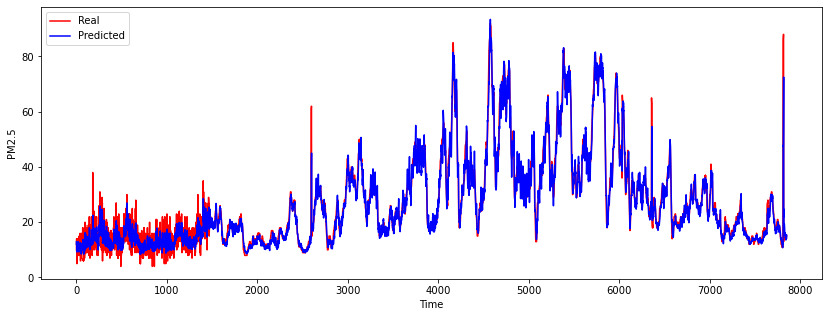

In [161]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real')
plt.plot(y_pred, color = 'blue', label = 'Predicted')
plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

In [162]:
import pickle

with open('lstm_'+province.lower()+'_4.pickle', 'wb') as fp:
    pickle.dump(y_pred, fp)

In [163]:
df1 = pd.DataFrame(y_pred)

In [164]:
df1.to_csv('lstm_'+province.lower()+'_4.csv')